Prepared by

*Asif Newaz, Lecturer, EEE, IUT*

# Empezar

The notebook will walk you through a typical workflow for solving a data science problem.
The first step in ML/DS is to understand and analyze the data you have. We will start with EDA (Exploratory Data Analysis) - the process of analyzing and investigating data sets and summarizing their main characteristics. It oftens take the help of data visualization methods for 'visual storytelling'.

Here, we will work with the titanic dataset as an example. The data is available in kaggle (https://www.kaggle.com/c/titanic).

## Question and problem definition

> The training set contains samples listing passengers who survived or did not survive the Titanic disaster. The question is - can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.


- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


## Workflow

 1. Import necessary libraries - pandas, numpy, matplotlib, seaborn
 2. Import data using pandas
 3. Analyze data using pandas
 4. Identify issues in the dataset - missing value, outliers, unrelated features
 5. Data visualization
 6. Removing irrelevant features
 7. convert categorical to numerical
 8. missing data handling

## **Import Libraries**

In [1]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

## **Import data**

we will use the Python Pandas package to manage the datasets. The data is already provided as training and test set. If not, you can randomly divide the data in a 80:20 ratio using sklearn library (we will cover that in the next lab).

In [2]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


You can see the number of samples and features/columns in the dataset automatically. Both training and test set have the same number of features but different number of examples. Test data do not have the 'survived' column - which is our target variable.

# Data Analysis

## Analyze the data

Pandas can help in understanding the dataset. For that, try to begin with the following questions -


**Which features are available in the dataset?**


In [5]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

you can see the result is a numpy array object. This is because the pandas library is built on top of numpy.

The feature are described here - https://www.kaggle.com/c/titanic/data

**What are the data types for various features?**

In [6]:
train_df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


We will need this information later. As you can see, there are -

- Seven features are integer or floats.
- Five features are strings (object).

**Which features are categorical?**

These values classify the samples into sets of similar samples.

- Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

**Which features are numerical?**

- Continous: Age, Fare. Discrete: SibSp, Parch.

**How many passengers were male and female?**

In [7]:
train_df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [8]:
train_df['SibSp'].value_counts()
# no of siblings and spouse

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [9]:
train_df['Parch'].value_counts()
# no of parents and children

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [10]:
train_df['Pclass'].value_counts()
# passenger class

,count
Pclass,
3,491
1,216
2,184


In [13]:
train_df['Embarked'].value_counts()
# Port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

,count
Embarked,
S,644
C,168
Q,77


In [11]:
train_df['Survived'].value_counts()
#549 people did not survive

,count
Survived,
0,549
1,342


**Which features are mixed data types?**

Numerical, alphanumeric data within same feature. These requires correction.

- Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

**Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.


**Which features contain blank, null or empty values?**

These will require correcting.

In [14]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


**What is the distribution of numerical feature values across the samples?**


In [16]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- Total samples are 891
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

**What is the distribution of categorical features?**


In [17]:
train_df.describe(include=['O'])
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)

## Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlation analysis**

We want to know how well does each feature correlate with Survival.

**Missing data handling**

1. We may want to complete Age feature as it is definitely correlated to survival.
2. We may want to complete the Embarked feature as it has only two missing entries.

**Correcting**

1. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
2. PassengerId may be dropped from training dataset as it does not contribute to survival.
3. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

**Creating**

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
3. We may also want to create a Fare range feature if it helps our analysis.


## Analysis using pivot tables

To confirm some of the observations and assumptions as well as identify groupwise pattern, we can utilize pivot tables.
we can look at the group relations with the target feature (survived) for the variables like - categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

- **Sex** We can see that Sex=female had very high survival rate at 74%.
- **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features.

In [19]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [18]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [22]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Data Visualization

**Analyze by visualizing data**

we can use visualization techniques for analyzing the data. Visualization is a powerful tool to understand the data, the relations between feature variables. We can obtain valuable insights regarding our data through a wide variety of visualization techniques.

"DataViz" is a widely utilized phenomenon in almost every sectors for its powerful ability to convey messages to anyone not having domain knowledge.

In [29]:
train_df
# you can see some charts directly using the tool at the right hand side of the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


from matplotlib import pyplot as plt
train_df['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_df['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_df['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
train_df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
train_df.groupby('Embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_df.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_df.plot(kind='scatter', x='Survived', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_df.plot(kind='scatter', x='Pclass', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_df.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train_df.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train_df.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Embarked')):
  _plot_series(series, series_name, i)
  fig.legend(title='Embarked', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Pclass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train_df.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Pclass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Pclass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train_df.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Embarked')):
  _plot_series(series, series_name, i)
  fig.legend(title='Embarked', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Pclass')

from matplotlib import pyplot as plt
train_df['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
train_df['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
train_df['Pclass'].plot(kind='line', figsize=(8, 4), title='Pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
train_df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Embarked'].value_counts()
    for x_label, grp in train_df.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('Embarked')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(train_df['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_df, x='PassengerId', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(train_df['Embarked'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_df, x='PassengerId', y='Embarked', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(train_df['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_df, x='Survived', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(train_df['Embarked'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_df, x='Survived', y='Embarked', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)


## Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

In [25]:
%matplotlib inline

<IPython.core.display.Javascript object>

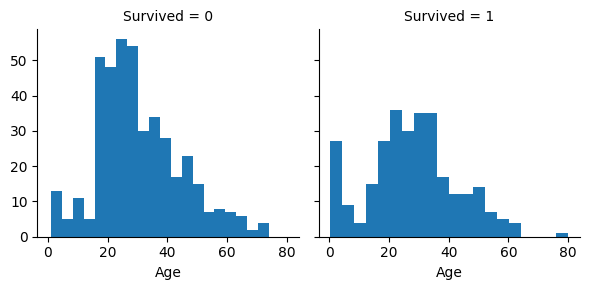

In [26]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

**Observations.**

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age in our model training.
- Complete the Age feature for null values.
- We may band age groups (optional)

### Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

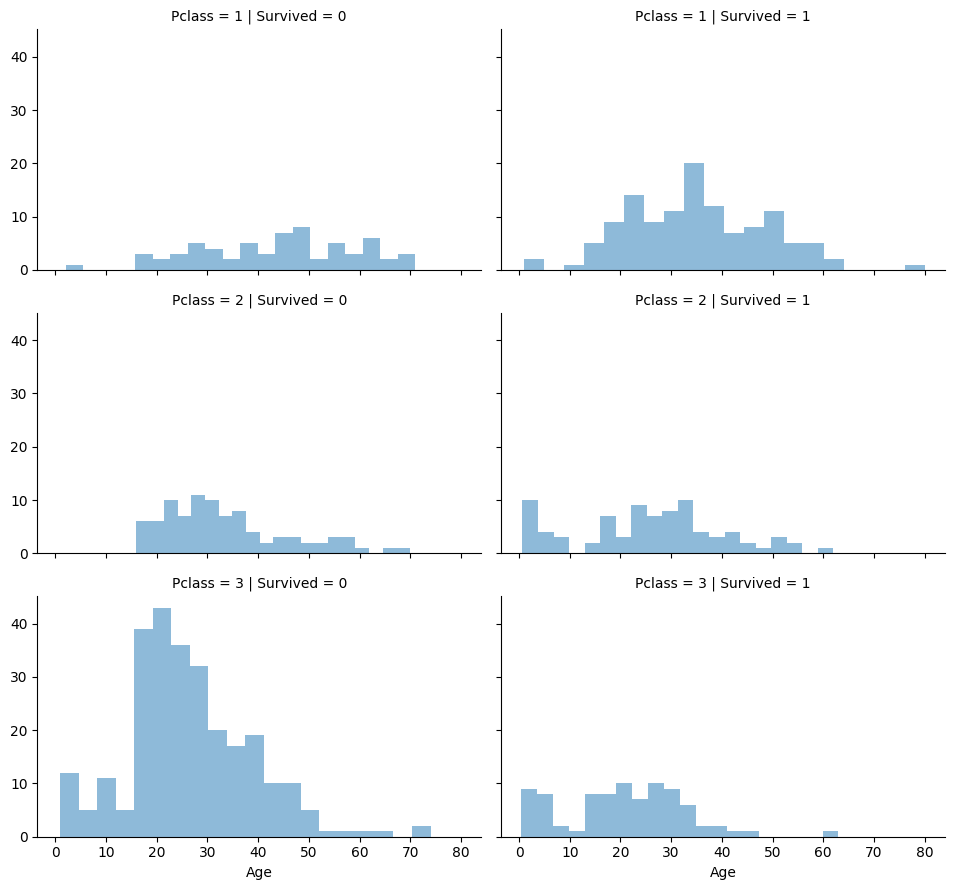

In [28]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass',  aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Observations.**

- Pclass=3 had most passengers, however most did not survive.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived.
- Most passengers in Pclass=1 survived.
- Pclass varies in terms of Age distribution of passengers.

**Decisions.**

- Consider Pclass for model training.

### Correlating categorical and numerical features

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


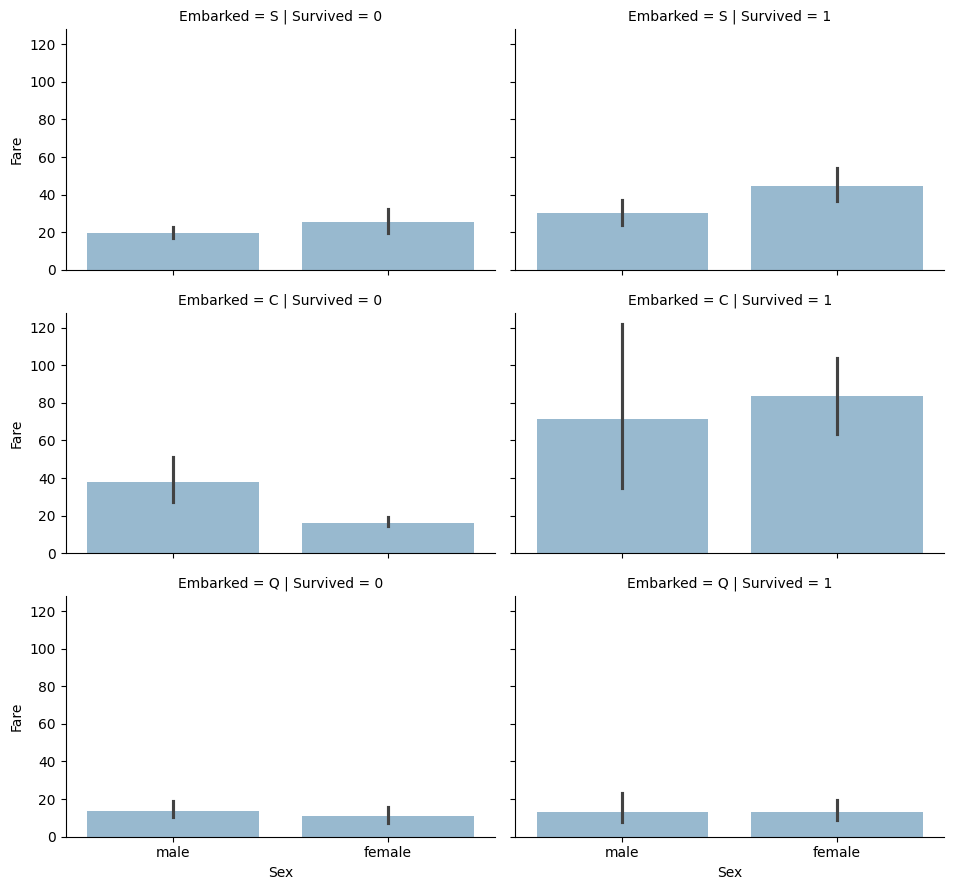

In [32]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5)
grid.add_legend()


**Observations.**

- Higher fare paying passengers had better survival.
- Port of embarkation correlates with survival rates.

**Decisions.**

- Consider banding Fare feature (optional)

# Feature Engineering

### Dropping features

We need to remove unimportant/irrelevant features to work on the dataset. By dropping features, we also have fewer data points. This speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin (too many missing), PassengerID (irrelevant), Name (unimportant), and Ticket (irrelevant) features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [34]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [36]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


### Converting a categorical feature

we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [38]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [39]:
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S


**Class Task** -> Do the same for Embarked feature

In [40]:
train_df['Embarked'] = train_df['Embarked'].map( {'S': 1, 'C': 0, 'Q':2} )
train_df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0
5,0,3,0,NaN,0,0,8.4583,2.0
6,0,1,0,54.0,0,0,51.8625,1.0
7,0,3,0,2.0,3,1,21.0750,1.0
8,1,3,1,27.0,0,2,11.1333,1.0
9,1,2,1,14.0,1,0,30.0708,0.0


In [41]:
test_df['Embarked'] = test_df['Embarked'].map( {'S': 1, 'C': 0, 'Q':2} )
test_df.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
413,3,0,NaN,0,0,8.0500,1
414,1,1,39.0,0,0,108.9000,0
415,3,0,38.5,0,0,7.2500,1
416,3,0,NaN,0,0,8.0500,1
417,3,0,NaN,1,1,22.3583,0


# Missing data handling

In [42]:
train_df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [43]:
test_df.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


The process is called imputation. There are different ways to impute missing entries which can be broadly classified as univariate and mutivariate techniques.
https://scikit-learn.org/stable/modules/impute.html

In [44]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [45]:
train_df_2=imp.fit_transform(train_df)

In [46]:
train_df_2

array([[ 0.    ,  3.    ,  0.    , ...,  0.    ,  7.25  ,  1.    ],
       [ 1.    ,  1.    ,  1.    , ...,  0.    , 71.2833,  0.    ],
       [ 1.    ,  3.    ,  1.    , ...,  0.    ,  7.925 ,  1.    ],
       ...,
       [ 0.    ,  3.    ,  1.    , ...,  2.    , 23.45  ,  1.    ],
       [ 1.    ,  1.    ,  0.    , ...,  0.    , 30.    ,  0.    ],
       [ 0.    ,  3.    ,  0.    , ...,  0.    ,  7.75  ,  2.    ]])

In [47]:
train_df_2.isnull().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [48]:
train_df_3= pd.DataFrame(train_df_2)
train_df_3

,0,1,2,3,4,5,6,7
0,0.0,3.0,0.0,22.000000,1.0,0.0,7.2500,1.0
1,1.0,1.0,1.0,38.000000,1.0,0.0,71.2833,0.0
2,1.0,3.0,1.0,26.000000,0.0,0.0,7.9250,1.0
3,1.0,1.0,1.0,35.000000,1.0,0.0,53.1000,1.0
4,0.0,3.0,0.0,35.000000,0.0,0.0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,27.000000,0.0,0.0,13.0000,1.0
887,1.0,1.0,1.0,19.000000,0.0,0.0,30.0000,1.0
888,0.0,3.0,1.0,29.699118,1.0,2.0,23.4500,1.0
889,1.0,1.0,0.0,26.000000,0.0,0.0,30.0000,0.0


In [49]:
train_df_3.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0


You can see the column names are missing. How to add column names?

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

# Correlation analysis

In [52]:
train_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.126753,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.307324,0.065997
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.023175,0.200988
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.042340,-0.301914
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.031095,0.890712
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.035756,0.783111
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.269588,0.217138
Embarked,-0.126753,0.307324,-0.023175,-0.042340,0.031095,-0.035756,-0.269588,1.000000,0.003390
FamilySize,0.016639,0.065997,0.200988,-0.301914,0.890712,0.783111,0.217138,0.003390,1.000000


<Axes: >

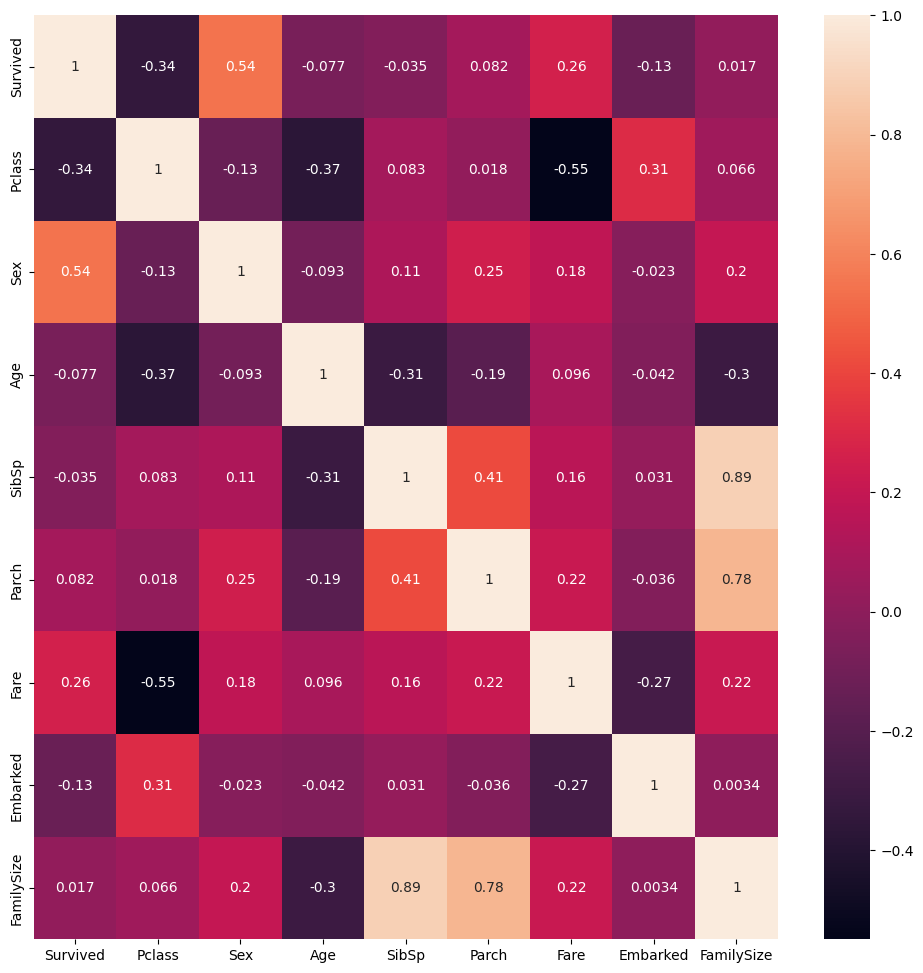

In [53]:
plt.figure(figsize=(12,12))
sns.heatmap(train_df.corr(), annot=True)

# Extraa

### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [50]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,0,22.0,1,0,7.2500,1.0,2
1,1,1,1,38.0,1,0,71.2833,0.0,2
2,1,3,1,26.0,0,0,7.9250,1.0,1
3,1,1,1,35.0,1,0,53.1000,1.0,2
4,0,3,0,35.0,0,0,8.0500,1.0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1.0,1
887,1,1,1,19.0,0,0,30.0000,1.0,1
888,0,3,1,NaN,1,2,23.4500,1.0,4
889,1,1,0,26.0,0,0,30.0000,0.0,1


In [51]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [54]:
train_df['IsAlone'] = 0
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,1.0,2,0
1,1,1,1,38.0,1,0,71.2833,0.0,2,0
2,1,3,1,26.0,0,0,7.9250,1.0,1,0
3,1,1,1,35.0,1,0,53.1000,1.0,2,0
4,0,3,0,35.0,0,0,8.0500,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1.0,1,0
887,1,1,1,19.0,0,0,30.0000,1.0,1,0
888,0,3,1,NaN,1,2,23.4500,1.0,4,0
889,1,1,0,26.0,0,0,30.0000,0.0,1,0


In [55]:
train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,1.0,2,0
1,1,1,1,38.0,1,0,71.2833,0.0,2,0
2,1,3,1,26.0,0,0,7.9250,1.0,1,1
3,1,1,1,35.0,1,0,53.1000,1.0,2,0
4,0,3,0,35.0,0,0,8.0500,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1.0,1,1
887,1,1,1,19.0,0,0,30.0000,1.0,1,1
888,0,3,1,NaN,1,2,23.4500,1.0,4,0
889,1,1,0,26.0,0,0,30.0000,0.0,1,1


In [56]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.